# Bengaluru House Price prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("bengaluru_house_data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [6]:
df.shape

(13320, 9)

In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df.duplicated().sum()

529

In [9]:
df.nunique().sum()

8243

In [10]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


In [13]:
df.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In [14]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [15]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [16]:
df['location'] = df['location'].fillna(df['location'].mode()[0])

In [17]:
df['society'] = df['society'].fillna('Unknown')

In [18]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Unknown,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [19]:
df['bath'] = df['bath'].fillna(df['bath'].mode()[0])

In [20]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])

In [21]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Unknown,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [22]:
df.isnull().sum()

area_type        0
availability     0
location         0
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [23]:
df['total_sqrt_numerical']=df['size'].str.split().str[0]
df['total_sqrt_numerical']=pd.to_numeric(df['total_sqrt_numerical'],errors='coerce')

In [24]:
df=df.drop('size',axis=1)

In [25]:
df['total_sqrt_numerical'] = df['total_sqrt_numerical'].fillna(df['total_sqrt_numerical'].mode()[0])

In [26]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['area_type', 'availability', 'location', 'society', 'total_sqft'], dtype='object')

Numerical type columns:
Index(['bath', 'balcony', 'price', 'total_sqrt_numerical'], dtype='object')


In [27]:
import re

In [28]:
def calculate_average(x):
    try:
        if '-' in x:
            parts = x.split('-')
            if(len(parts)==2):
                return (float(parts[0]) + float(parts[1])) / 2
            return mean
        else:
            return float(x)
    except ValueError:
        return np.nan


In [29]:
df['total_sqft'] = df['total_sqft'].apply(calculate_average)

In [30]:
for i in df['total_sqft']:
    if i=='nan':
        df.drop('total_sqft',axis=0)

In [31]:
df.isnull().sum()

area_type                0
availability             0
location                 0
society                  0
total_sqft              46
bath                     0
balcony                  0
price                    0
total_sqrt_numerical     0
dtype: int64

In [32]:
df=df.dropna()

In [33]:
df.isnull().sum()

area_type               0
availability            0
location                0
society                 0
total_sqft              0
bath                    0
balcony                 0
price                   0
total_sqrt_numerical    0
dtype: int64

In [34]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,total_sqrt_numerical
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,3.0
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5.0
13316,Super built-up Area,Ready To Move,Richards Town,Unknown,3600.0,5.0,2.0,400.00,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2.0


In [35]:
df.isnull().sum()

area_type               0
availability            0
location                0
society                 0
total_sqft              0
bath                    0
balcony                 0
price                   0
total_sqrt_numerical    0
dtype: int64

In [36]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [37]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [38]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['area_type']
Non-Categorical Features: ['availability', 'location', 'society']
Discrete Features: ['balcony']
Continuous Features: ['total_sqft', 'bath', 'price', 'total_sqrt_numerical']


In [39]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

balcony
[1. 3. 2. 0.]



In [40]:
for i in discrete:
    print(df[i].value_counts())
    print()

balcony
2.0    5435
1.0    4683
3.0    1627
0.0    1000
Name: count, dtype: int64



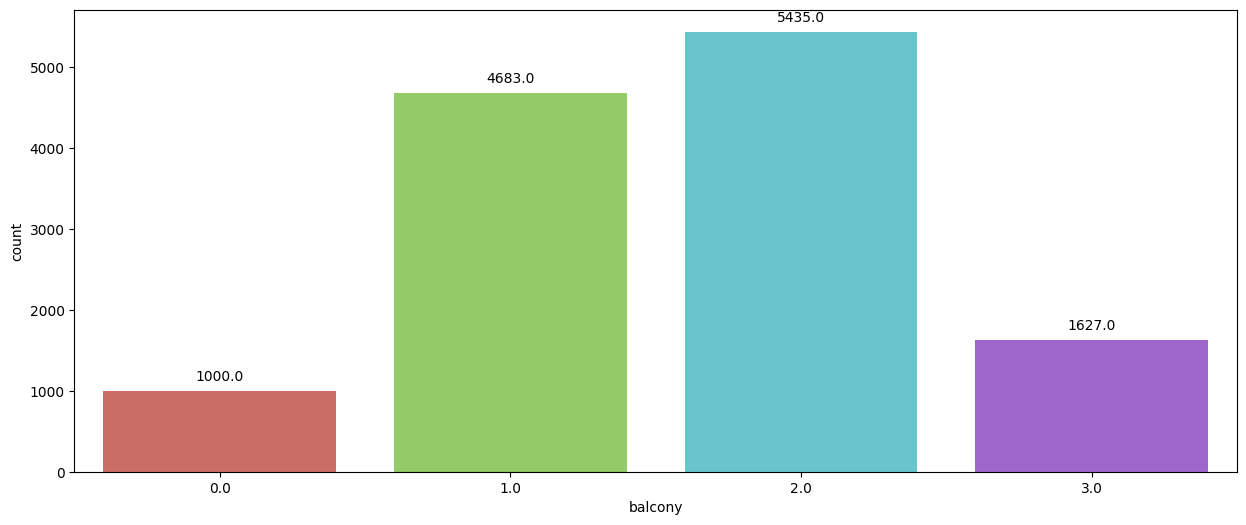

In [41]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

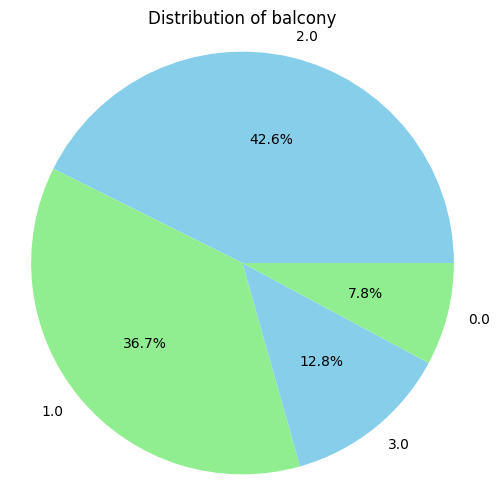

In [42]:
for i in discrete:
    plt.figure(figsize=(6,6))
    counts = df[i].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title(f'Distribution of {i}')
    plt.axis('equal')  
    plt.show()

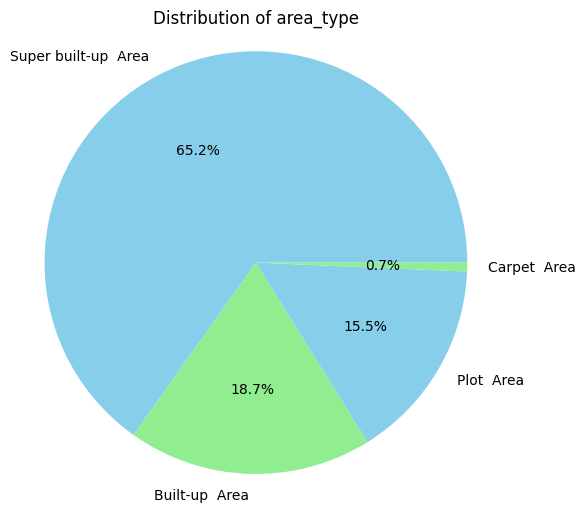

In [43]:
for i in categorical:
    plt.figure(figsize=(6,6))
    counts = df[i].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title(f'Distribution of {i}')
    plt.axis('equal')  
    plt.show()

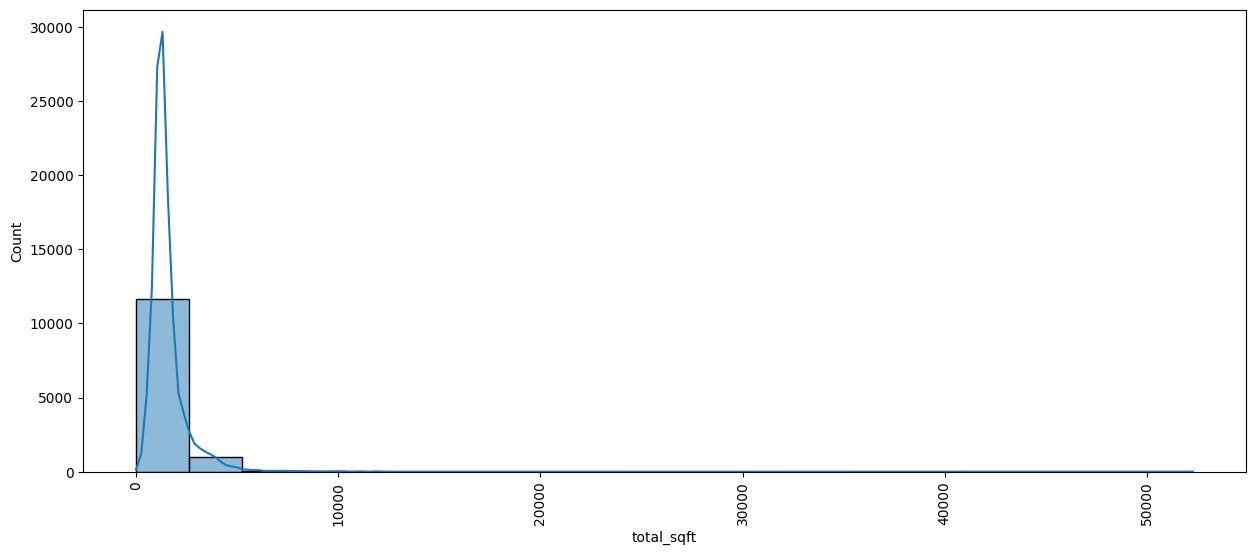

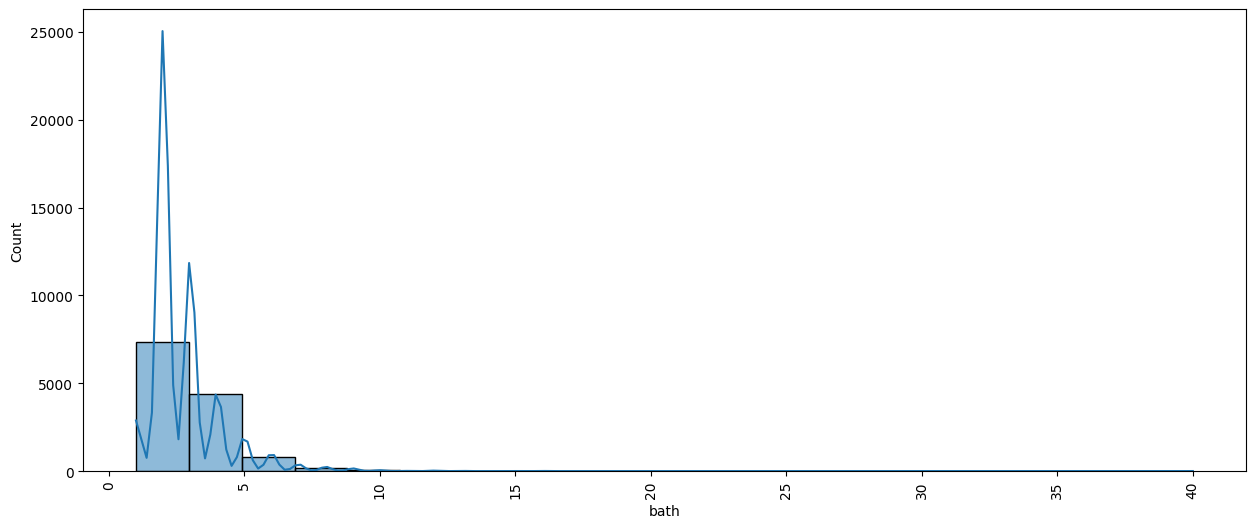

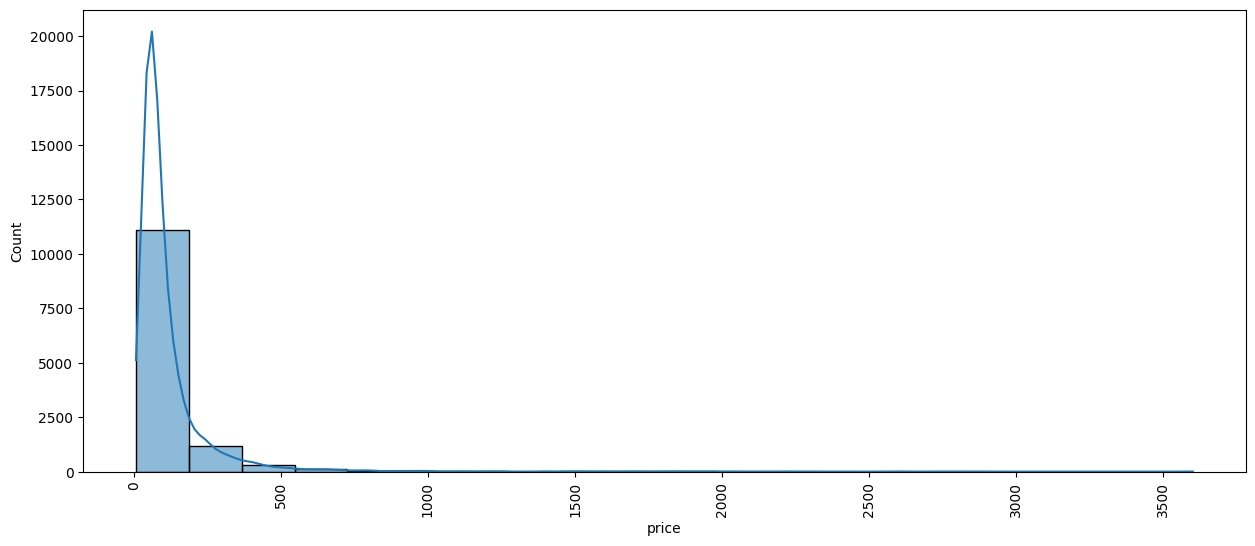

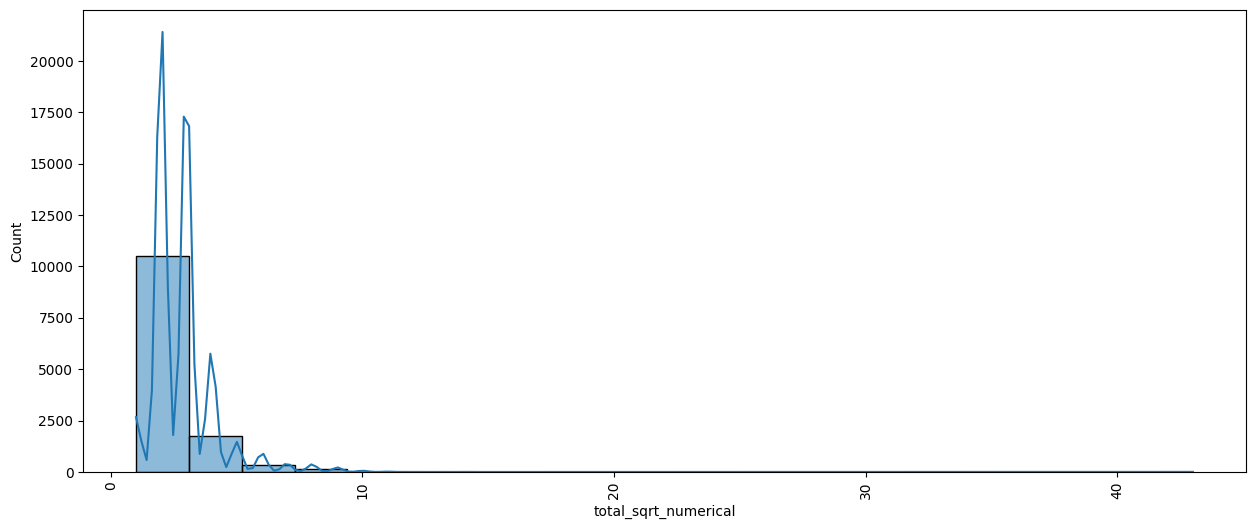

In [44]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

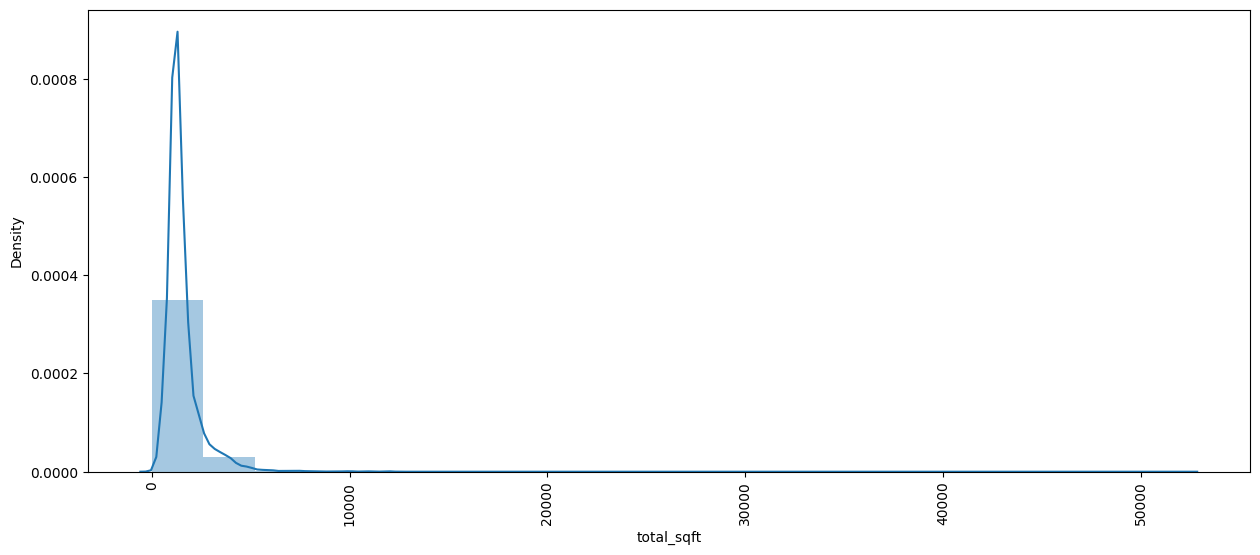

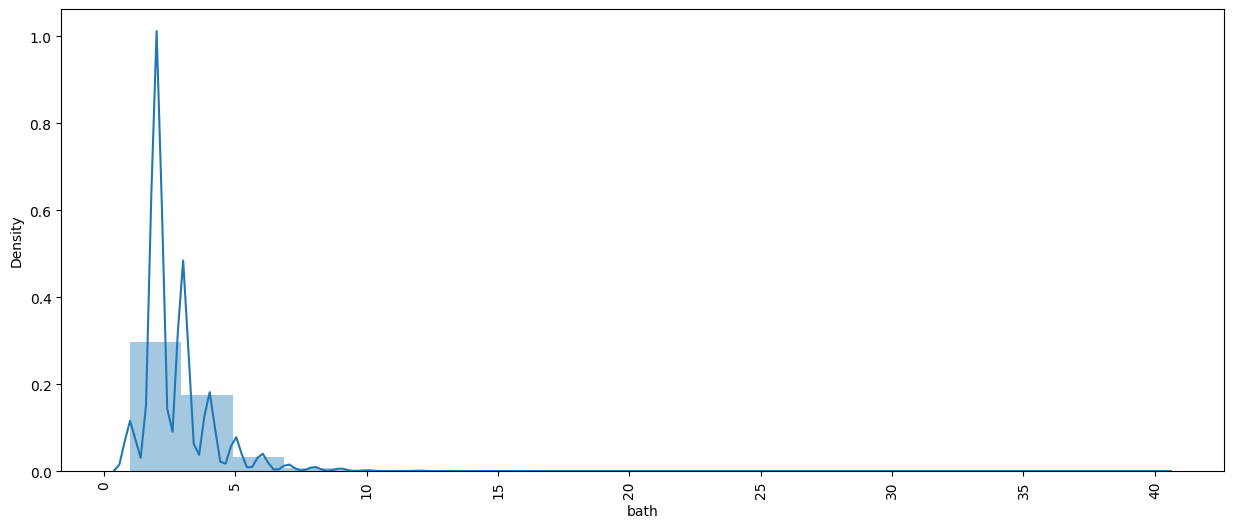

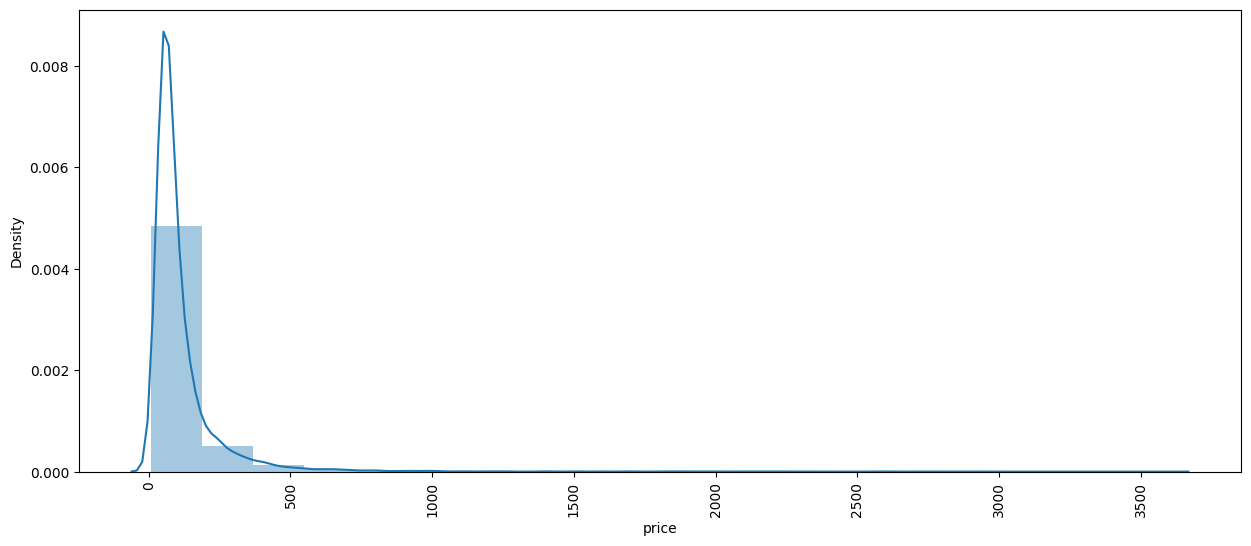

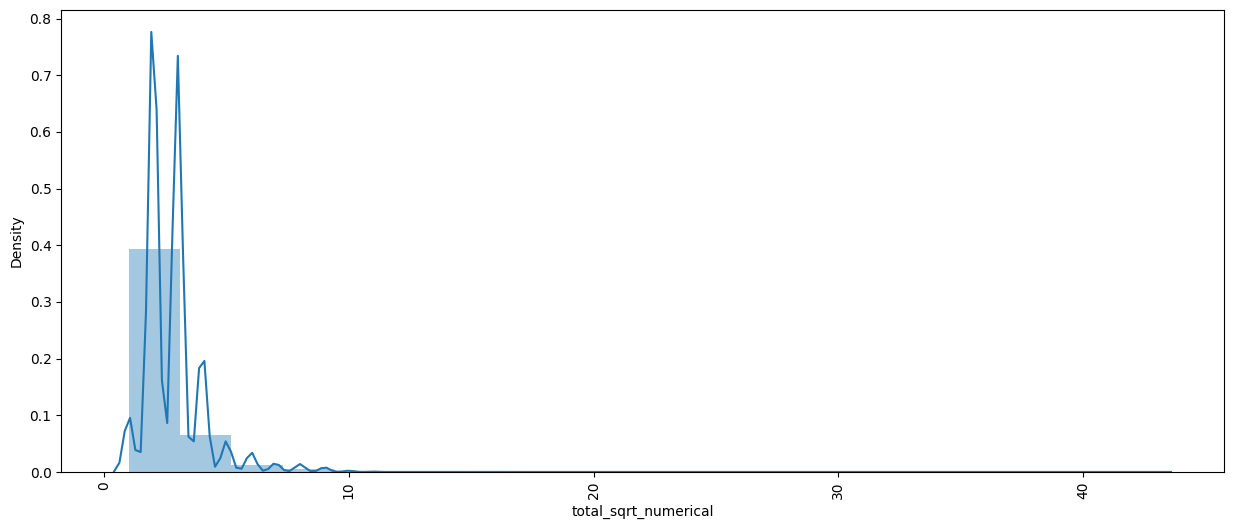

In [45]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

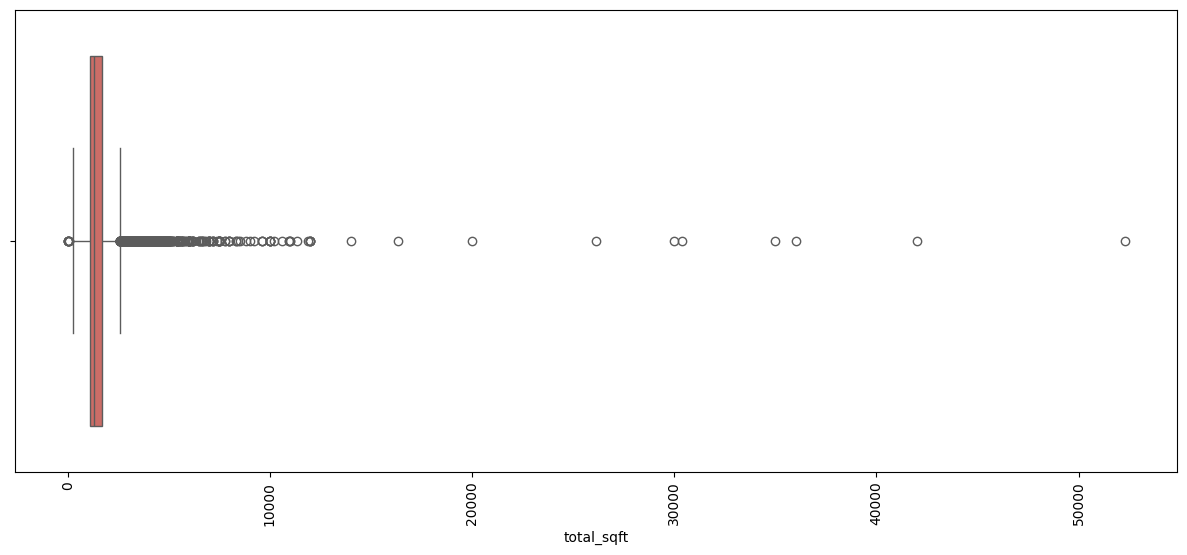

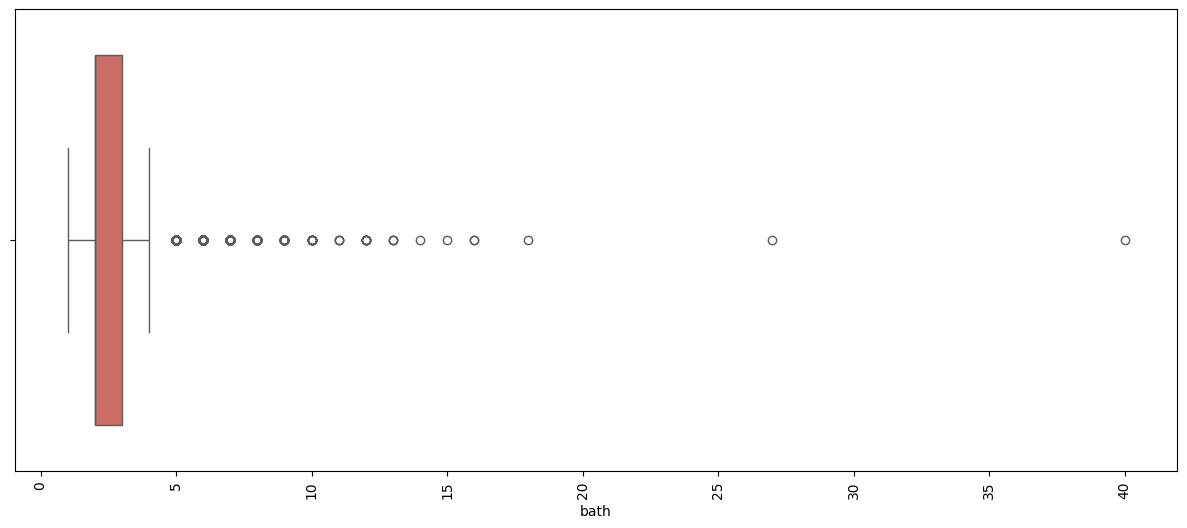

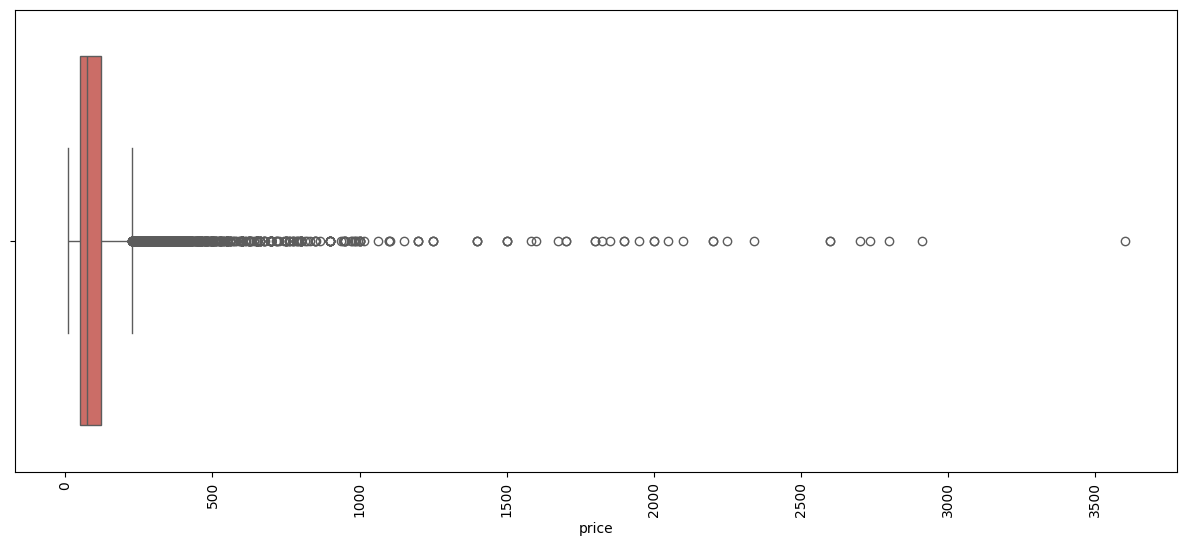

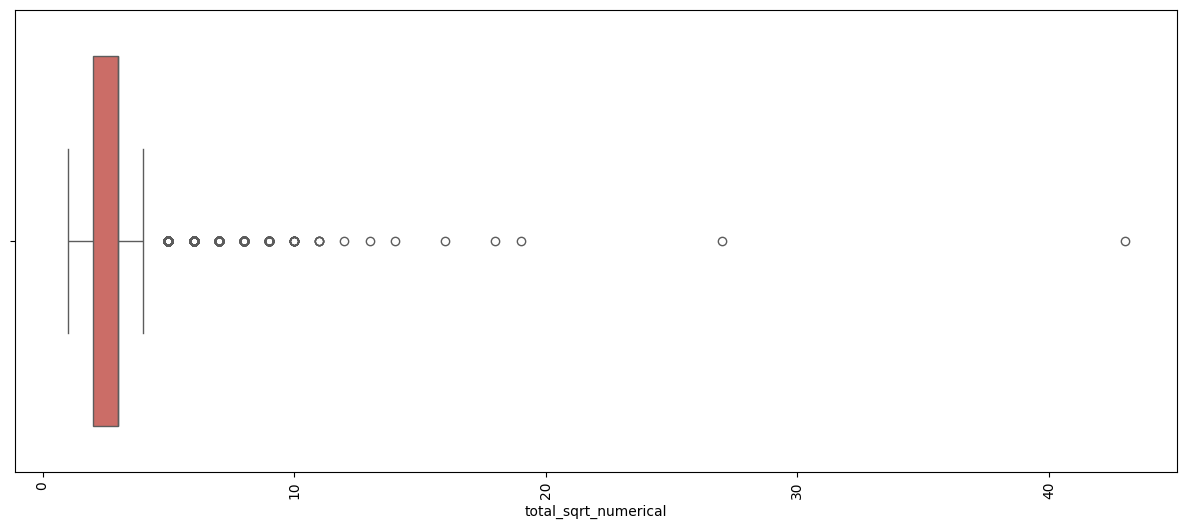

In [46]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

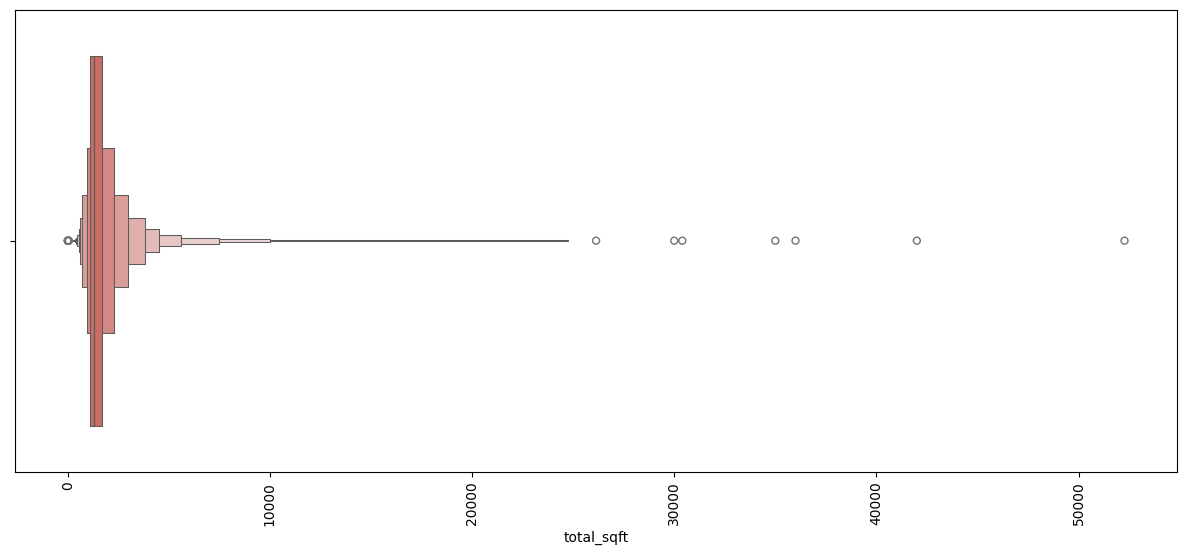

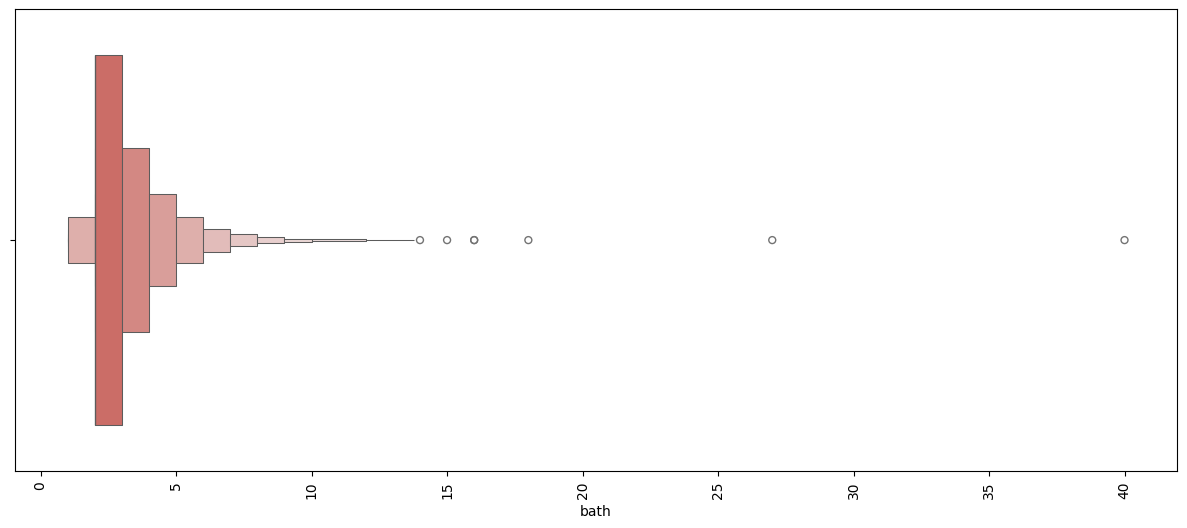

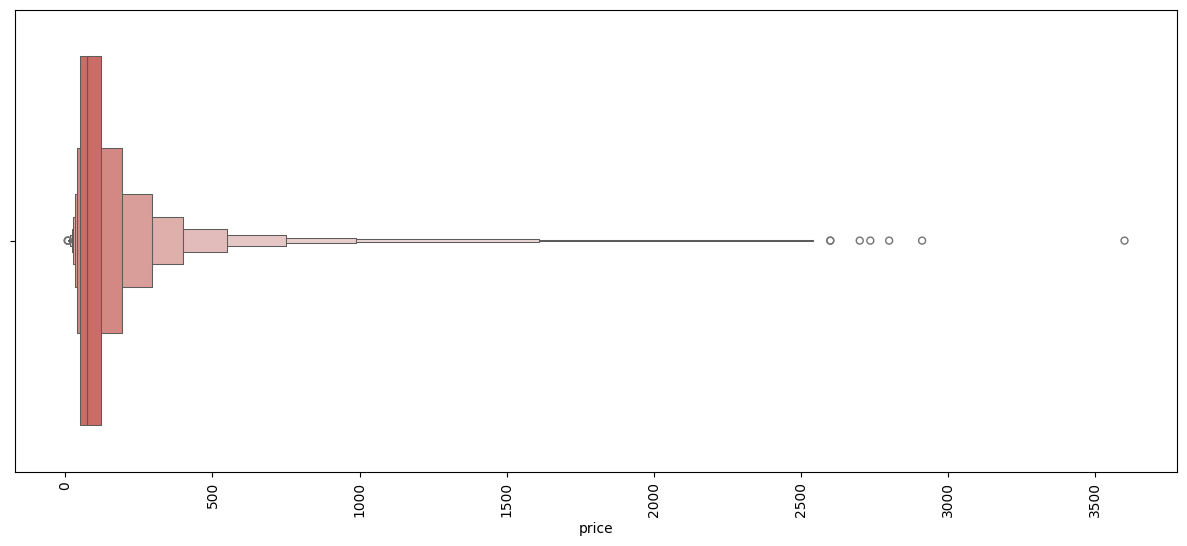

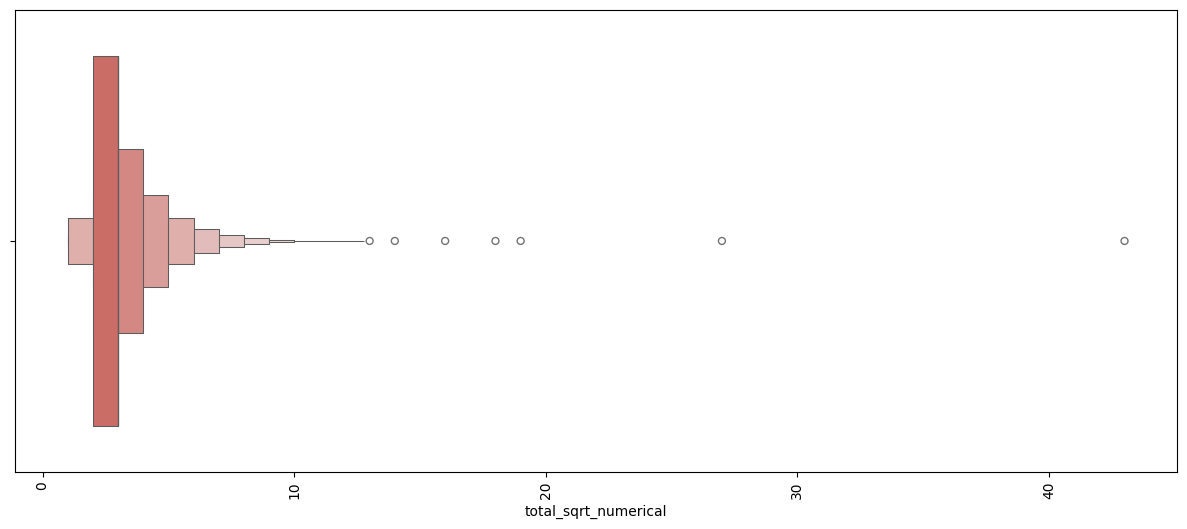

In [47]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

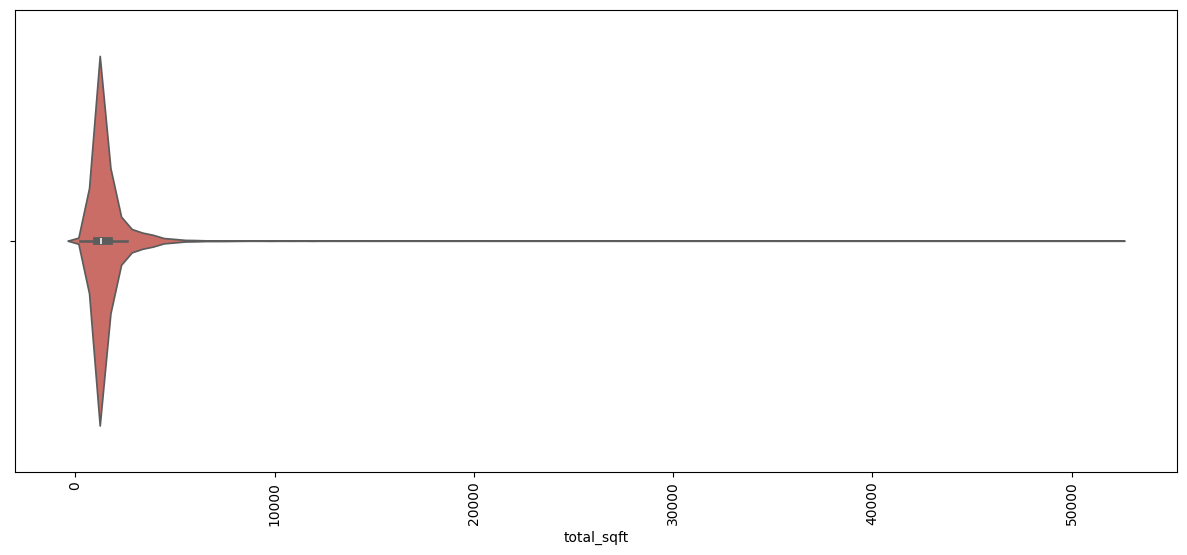

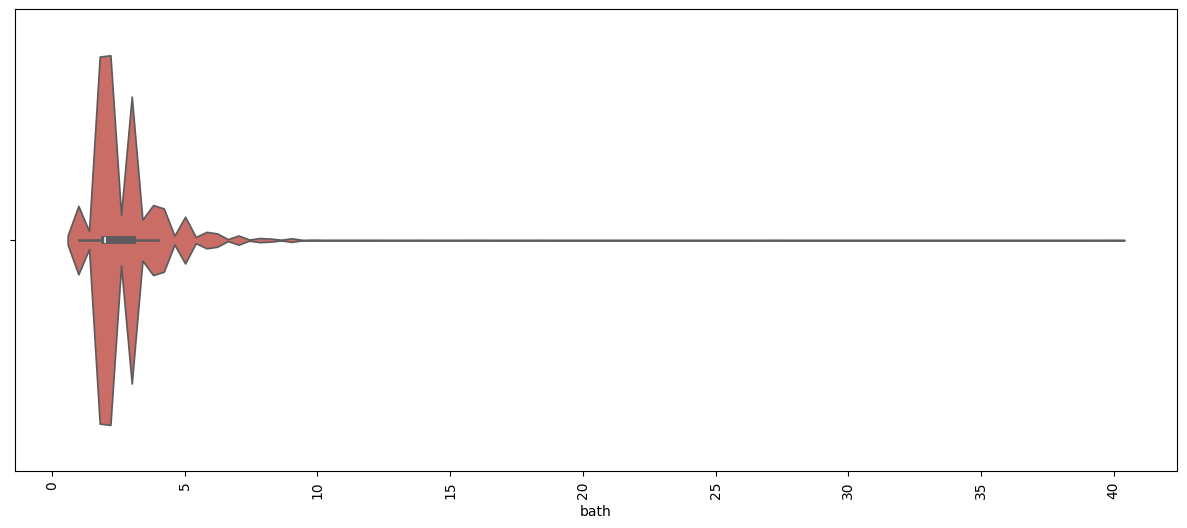

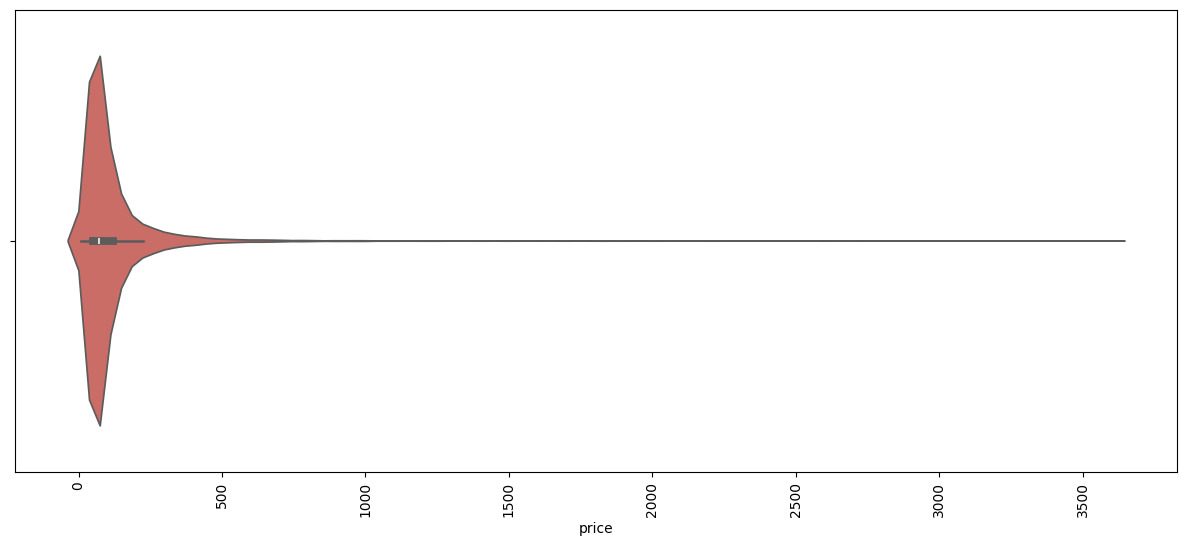

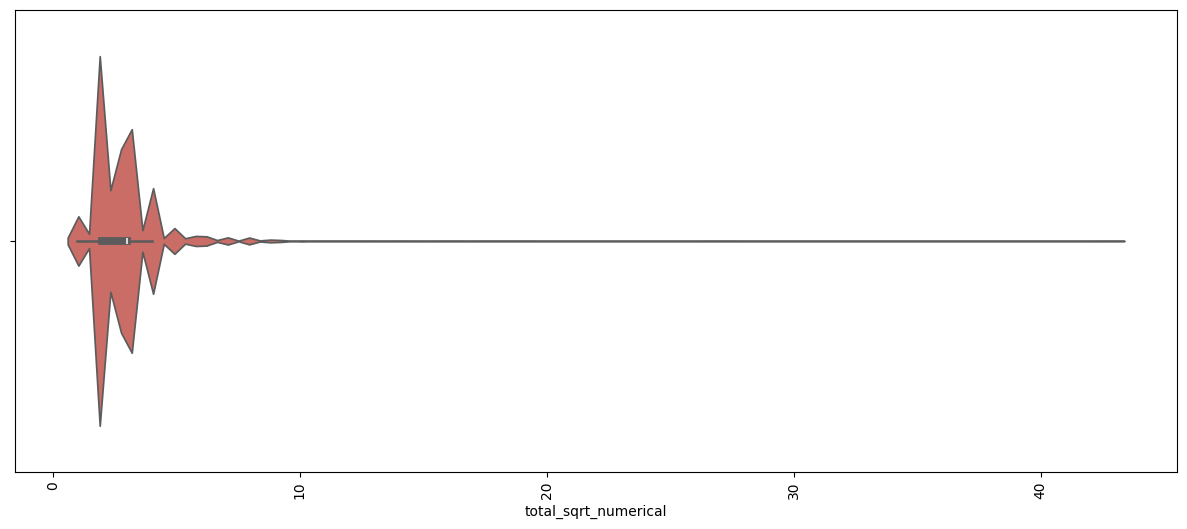

In [48]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [49]:
# Bivariate

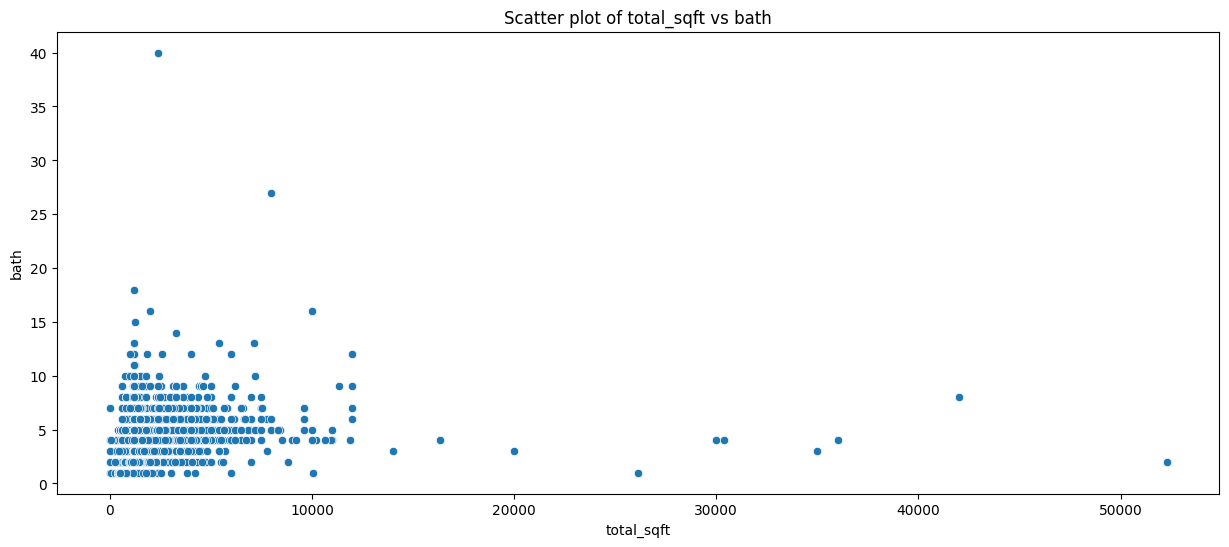

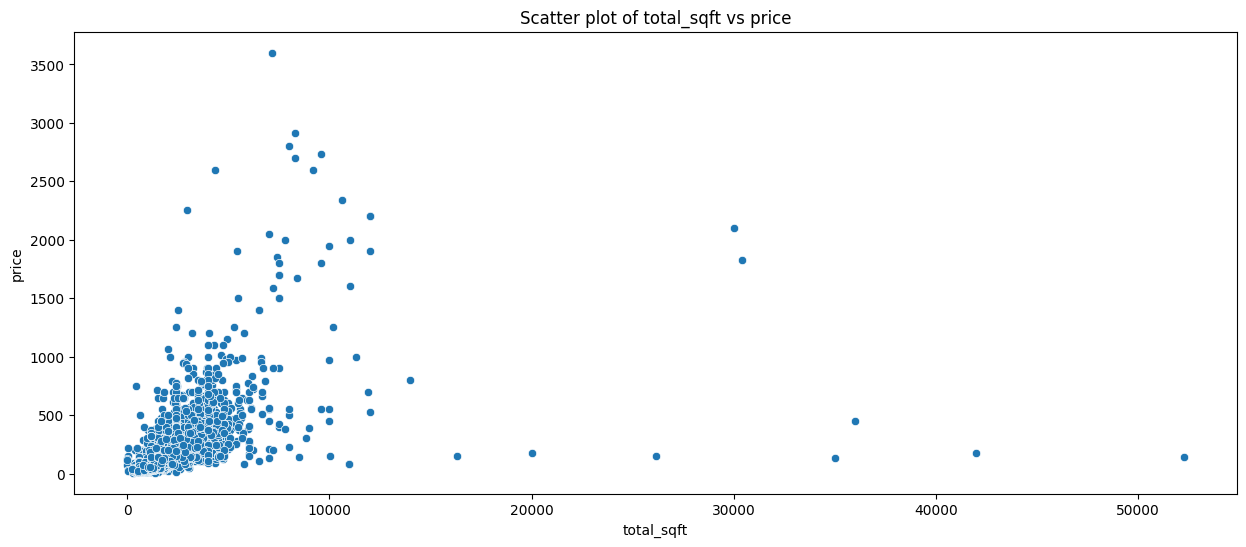

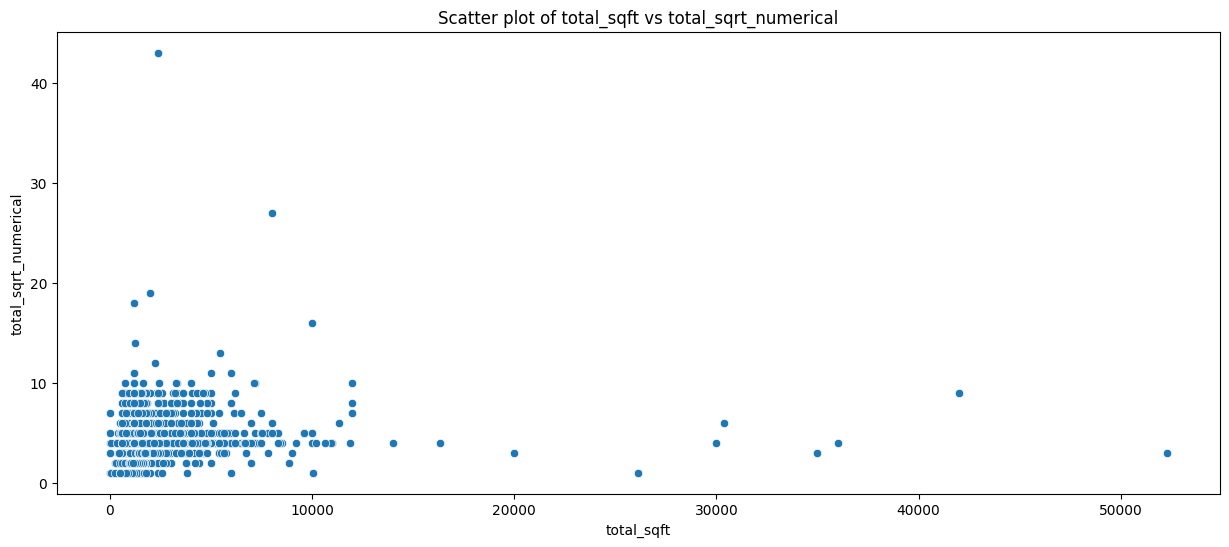

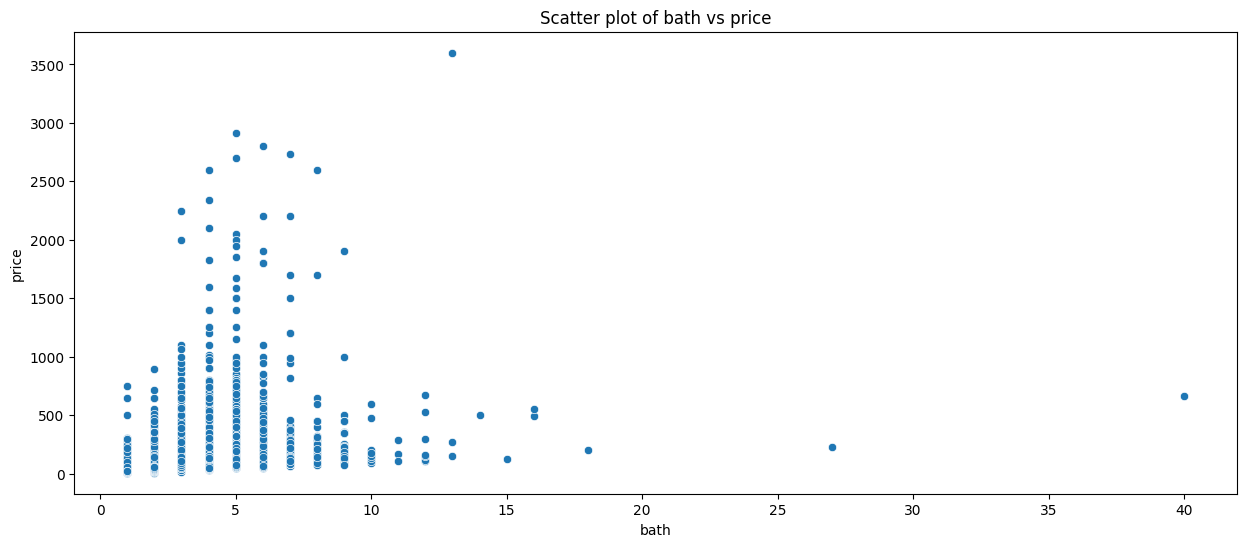

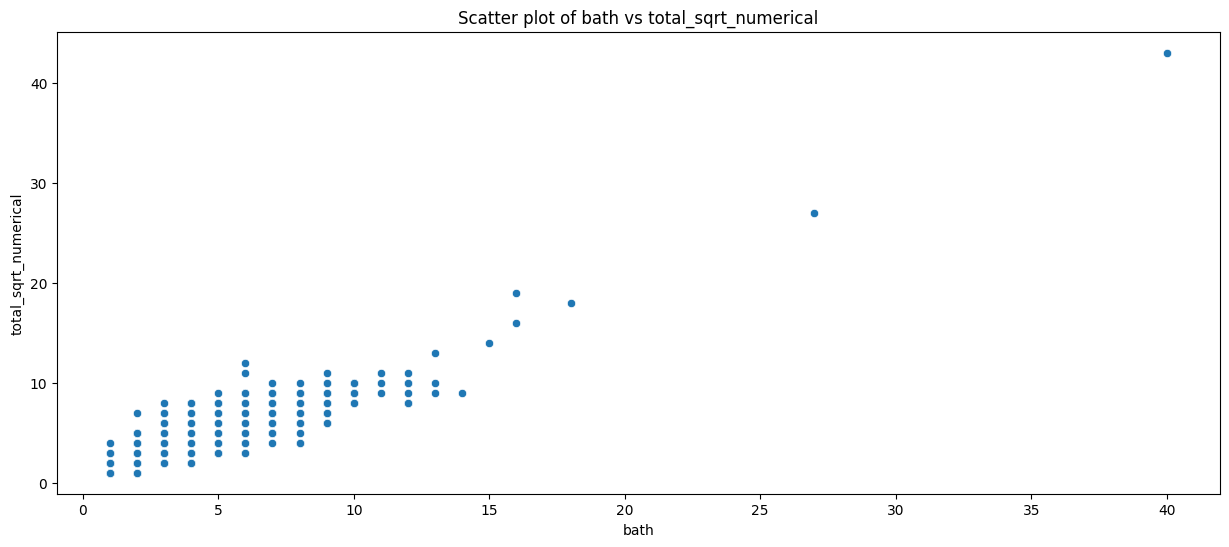

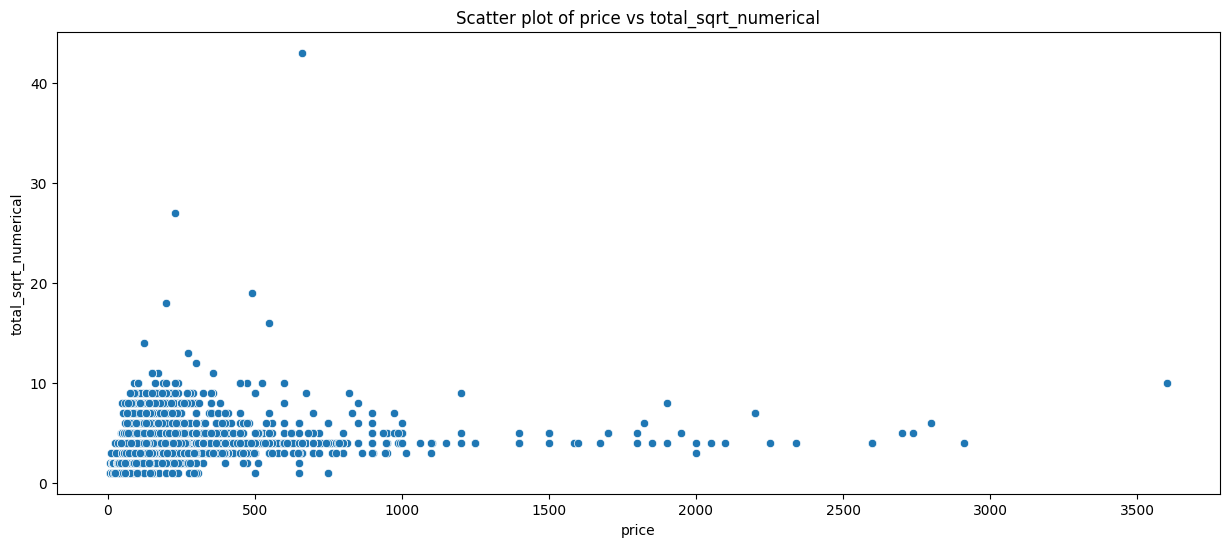

In [50]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

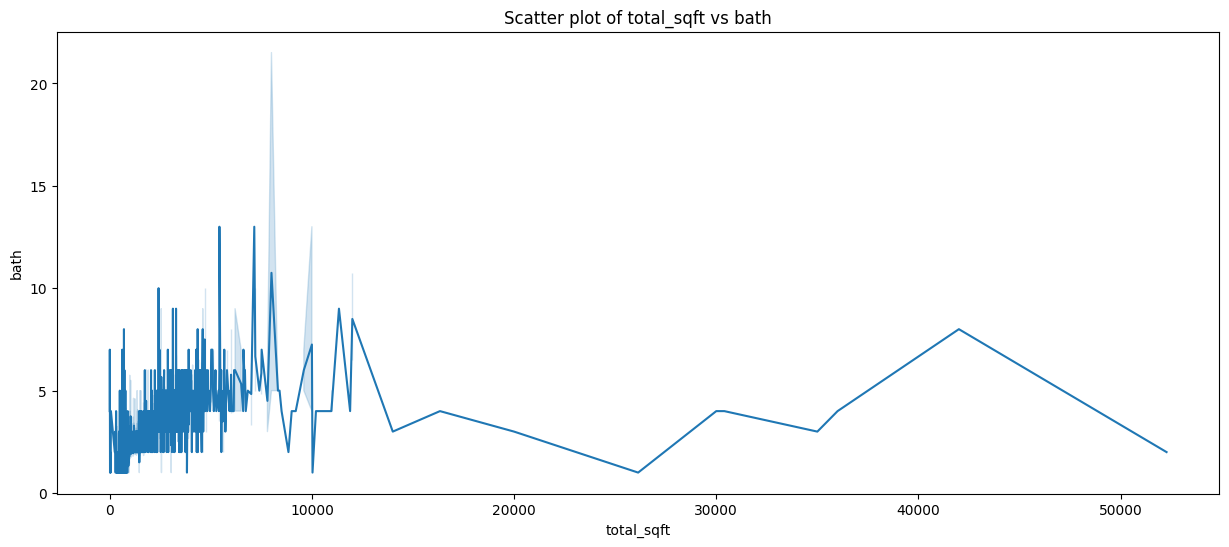

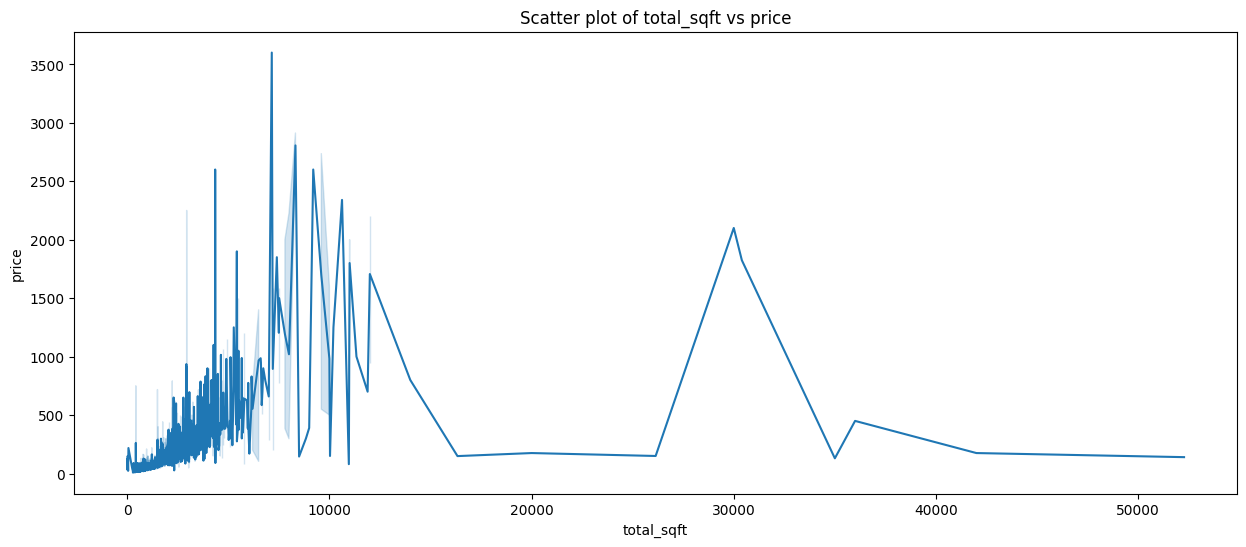

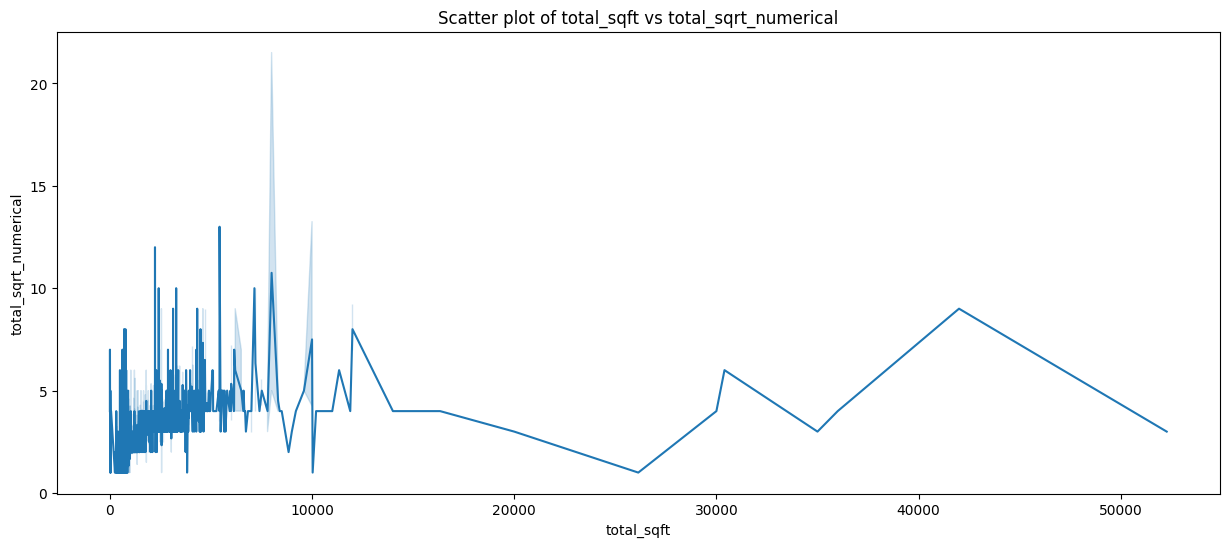

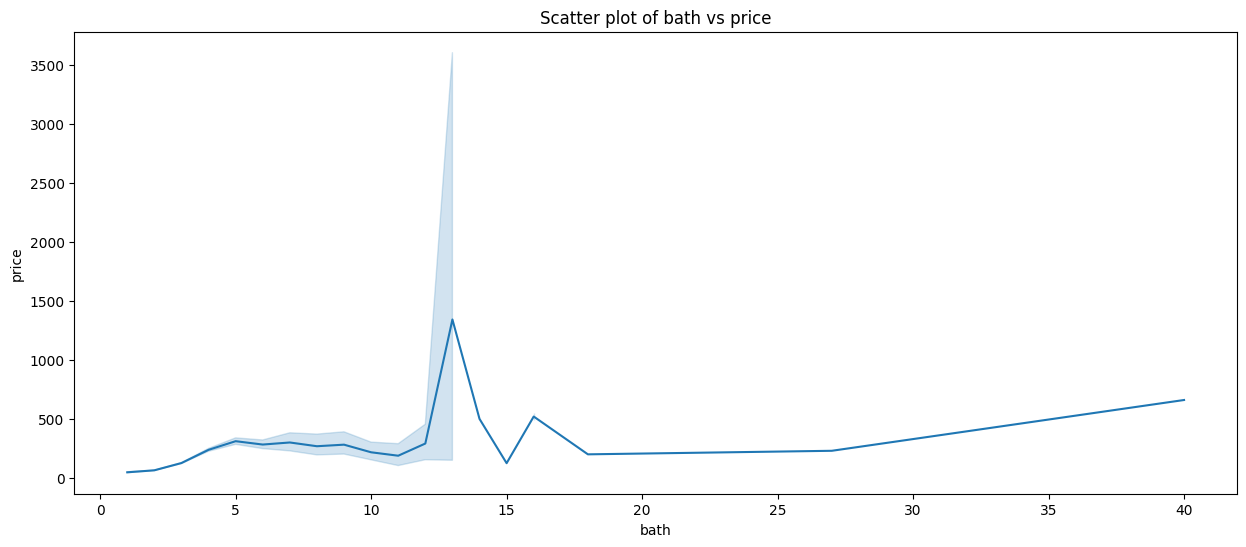

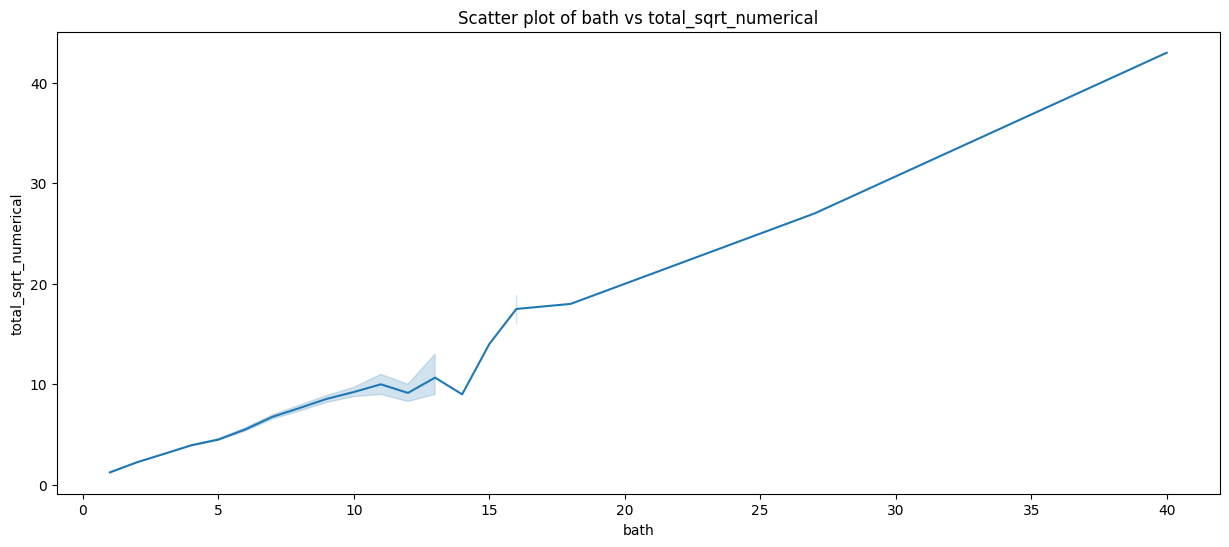

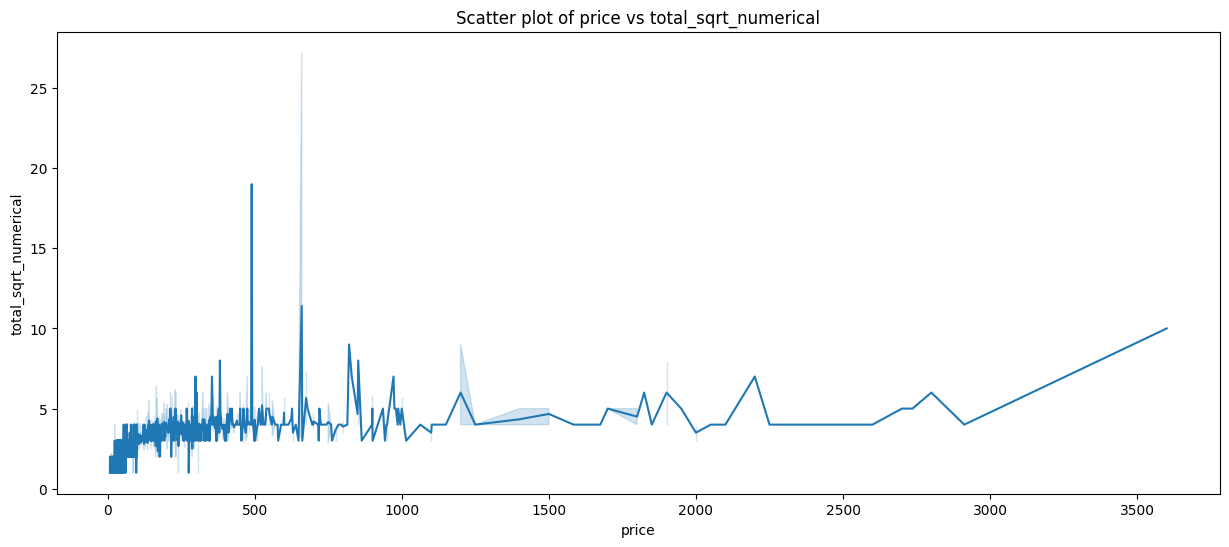

In [51]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

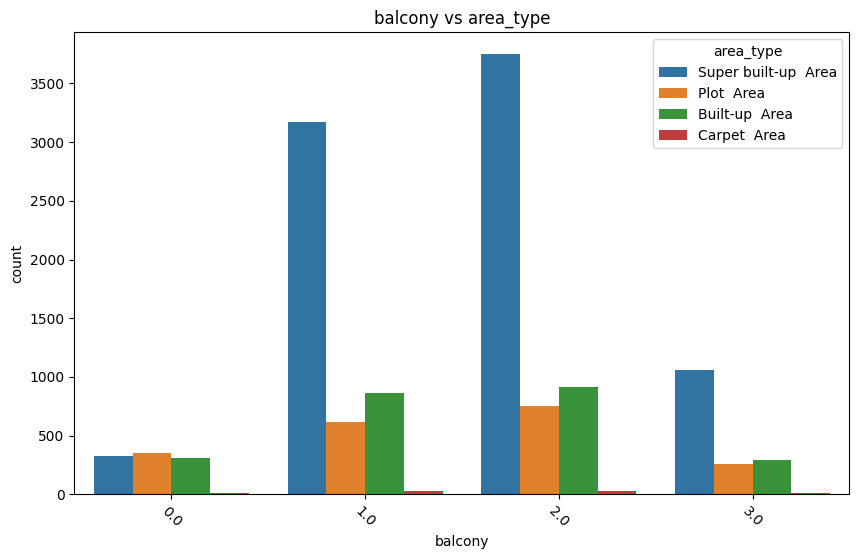

In [52]:
for cat1 in discrete:
    for cat2 in categorical:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=cat1, hue=cat2)
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = -45)
            
            plt.show()

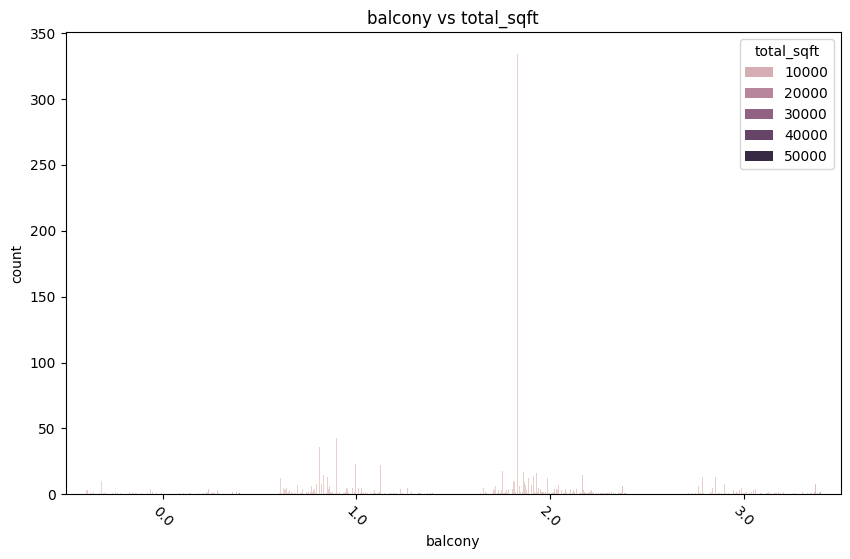

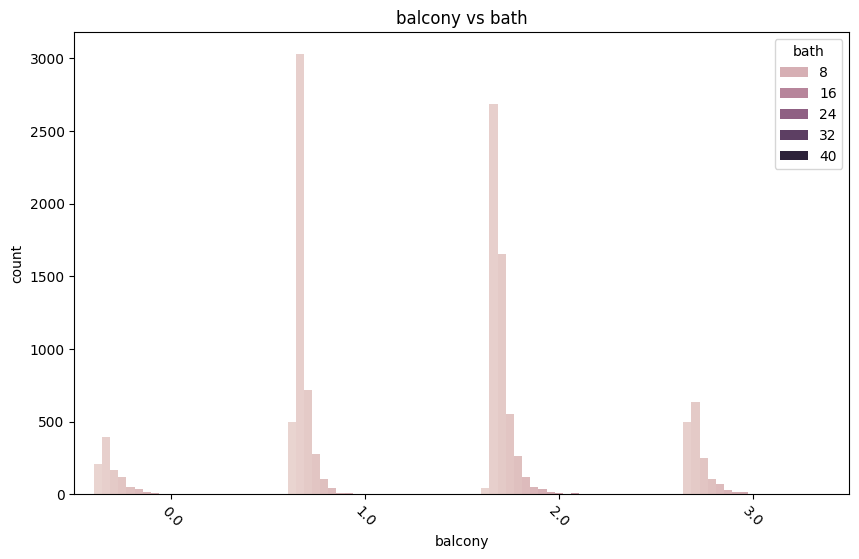

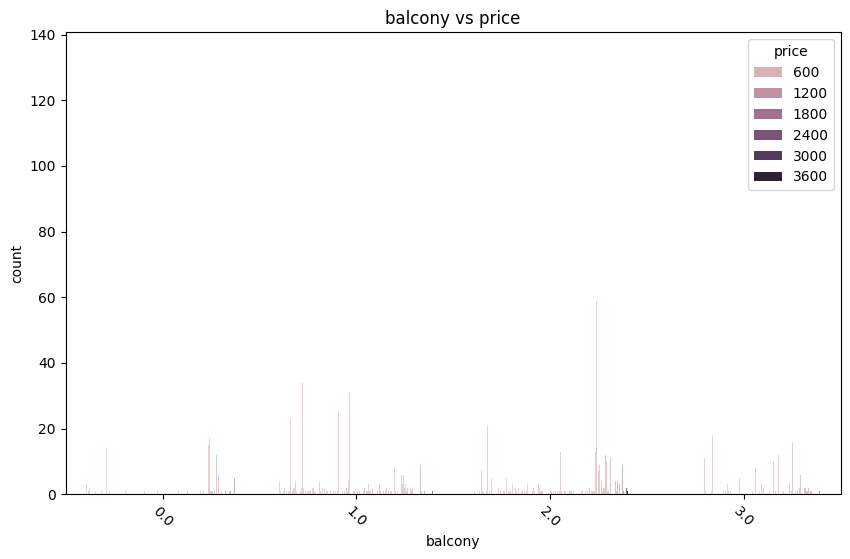

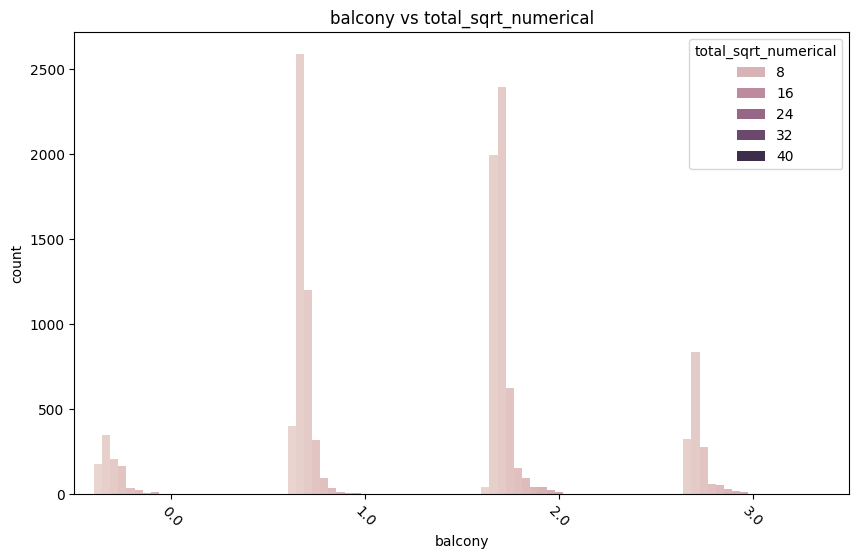

In [53]:
for cat1 in discrete:
    for cat2 in continuous:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=cat1, hue=cat2)
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = -45)
            
            plt.show()

In [54]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,total_sqrt_numerical
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,3.0
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5.0
13316,Super built-up Area,Ready To Move,Richards Town,Unknown,3600.0,5.0,2.0,400.00,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2.0


In [55]:
df[df.total_sqrt_numerical>5]

,area_type,availability,location,society,total_sqft,bath,balcony,price,total_sqrt_numerical
9,Plot Area,Ready To Move,Gandhi Bazar,Unknown,1020.0,6.0,2.0,370.0,6.0
45,Plot Area,Ready To Move,HSR Layout,Unknown,600.0,9.0,2.0,200.0,8.0
58,Plot Area,Ready To Move,Murugeshpalya,Unknown,1407.0,4.0,1.0,150.0,6.0
64,Built-up Area,Ready To Move,Bommanahalli,Unknown,3000.0,8.0,0.0,140.0,8.0
68,Plot Area,Ready To Move,Devarachikkanahalli,Unknown,1350.0,7.0,0.0,85.0,8.0
...,...,...,...,...,...,...,...,...,...
13219,Plot Area,Ready To Move,Laggere,Unknown,1590.0,9.0,3.0,132.0,7.0
13221,Plot Area,Ready To Move,T Dasarahalli,Unknown,1178.0,9.0,1.0,75.0,9.0
13226,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Unknown,6000.0,8.0,3.0,215.0,8.0
13277,Plot Area,Ready To Move,Kundalahalli Colony,Unknown,1400.0,7.0,2.0,218.0,7.0


In [56]:
# future engineering- creating new features from existing features

In [57]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [58]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,total_sqrt_numerical,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,2.0,4250.000000


In [59]:
data1=df.copy()

In [60]:
data1['location'].value_counts()

location
Whitefield                        522
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    247
Thanisandra                       228
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1299, dtype: int64

In [61]:
location_stats = data1['location'].value_counts()

In [62]:
len(location_stats[location_stats<=20])

1160

In [63]:
locationlessthan20=location_stats[location_stats<=20]
locationlessthan20

location
Binny Pete                        20
Kogilu                            20
Yelachenahalli                    20
Sanjay nagar                      20
HBR Layout                        20
                                  ..
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Kannur                             1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1160, dtype: int64

In [64]:
len(data1.location.unique())

1299

In [65]:
data1.location=data1.location.apply(lambda x: 'other' if x in locationlessthan20 else x)
len(data1.location.unique())

140

In [66]:
data1.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,total_sqrt_numerical,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Ready To Move,other,Theanmp,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,2.0,4250.000000


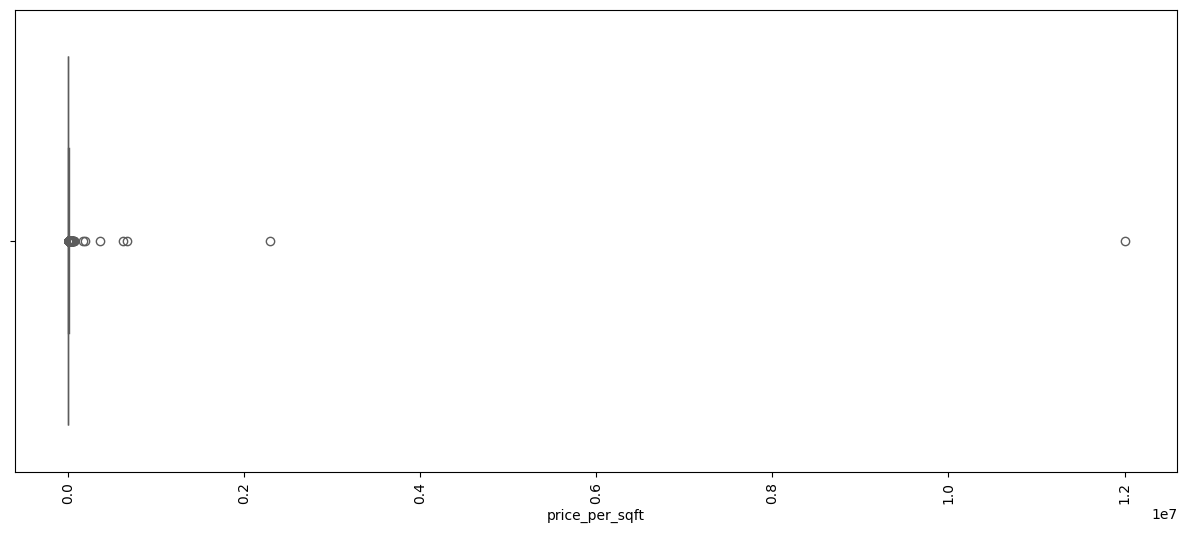

In [67]:
plt.figure(figsize=(15,6))
sns.boxplot(x=data1['price_per_sqft'], palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [68]:
# outlayer detection code is below

In [69]:
df1=df[['total_sqft','bath','balcony','price','total_sqrt_numerical','price_per_sqft']]

In [70]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

In [71]:
IQR

total_sqft               591.00000
bath                       1.00000
balcony                    1.00000
price                     70.00000
total_sqrt_numerical       1.00000
price_per_sqft          3100.14948
dtype: float64

In [72]:
x = Q1 - 1.5 * IQR

In [73]:
x

total_sqft              213.500000
bath                      0.500000
balcony                  -0.500000
price                   -55.000000
total_sqrt_numerical      0.500000
price_per_sqft         -351.665538
dtype: float64

In [74]:
x = Q3 + 1.5 * IQR

In [75]:
x

total_sqft               2577.500000
bath                        4.500000
balcony                     3.500000
price                     225.000000
total_sqrt_numerical        4.500000
price_per_sqft          12048.932382
dtype: float64

In [76]:
# this is 1.5 rule or Turkish Rule for outlier removal

In [77]:
df = df[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [78]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,total_sqrt_numerical,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,2.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,2.0,3247.863248
...,...,...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,IBityin,1675.0,3.0,2.0,92.13,3.0,5500.298507
13310,Super built-up Area,Ready To Move,Rachenahalli,Unknown,1050.0,2.0,2.0,52.71,2.0,5020.000000
13312,Super built-up Area,Ready To Move,Bellandur,Unknown,1262.0,2.0,2.0,47.00,2.0,3724.247227
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,3.0,6530.612245


In [79]:
df.duplicated().sum()

1

In [80]:
df= df.drop_duplicates()

In [81]:
df.isnull().sum()

area_type               0
availability            0
location                0
society                 0
total_sqft              0
bath                    0
balcony                 0
price                   0
total_sqrt_numerical    0
price_per_sqft          0
dtype: int64

In [82]:
corr=df1.corr()

In [83]:
corr

,total_sqft,bath,balcony,price,total_sqrt_numerical,price_per_sqft
total_sqft,1.000000,0.385607,0.152439,0.574008,0.344206,-0.008566
bath,0.385607,1.000000,0.204059,0.450843,0.896237,0.030613
balcony,0.152439,0.204059,1.000000,0.123506,0.190676,0.009317
price,0.574008,0.450843,0.123506,1.000000,0.394577,0.027975
total_sqrt_numerical,0.344206,0.896237,0.190676,0.394577,1.000000,0.030628
price_per_sqft,-0.008566,0.030613,0.009317,0.027975,0.030628,1.000000


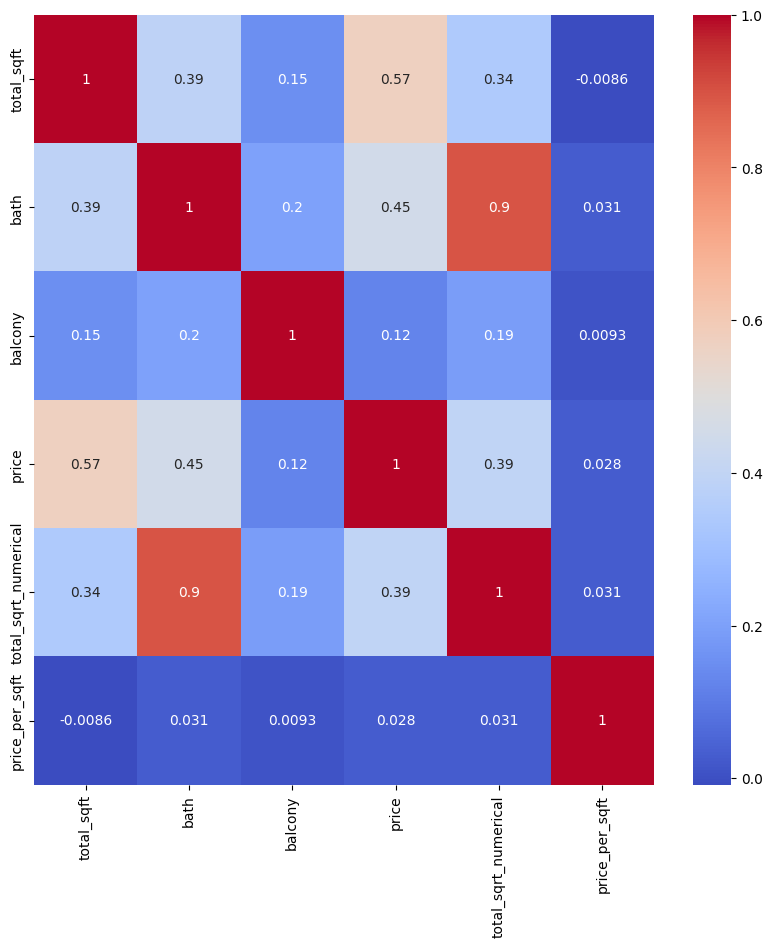

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [85]:
df=df.drop('total_sqrt_numerical',axis=1)

In [86]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,51.00,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,3247.863248
...,...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,IBityin,1675.0,3.0,2.0,92.13,5500.298507
13310,Super built-up Area,Ready To Move,Rachenahalli,Unknown,1050.0,2.0,2.0,52.71,5020.000000
13312,Super built-up Area,Ready To Move,Bellandur,Unknown,1262.0,2.0,2.0,47.00,3724.247227
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,6530.612245


In [87]:
df=df.drop('price',axis=1)

In [88]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,3247.863248
...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,IBityin,1675.0,3.0,2.0,5500.298507
13310,Super built-up Area,Ready To Move,Rachenahalli,Unknown,1050.0,2.0,2.0,5020.000000
13312,Super built-up Area,Ready To Move,Bellandur,Unknown,1262.0,2.0,2.0,3724.247227
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,6530.612245


In [89]:
df.nunique()

area_type            4
availability        81
location          1064
society           2433
total_sqft        1483
bath                 4
balcony              4
price_per_sqft    6400
dtype: int64

In [90]:
df.availability=df.availability.apply(lambda x: 'Not Ready' if x != 'Ready To Move' else x)

In [91]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price_per_sqft
0,Super built-up Area,Not Ready,Electronic City Phase II,Coomee,1056.0,2.0,1.0,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,Unknown,1440.0,2.0,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,Unknown,1200.0,2.0,1.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,3247.863248
...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Ready To Move,Yeshwanthpur,IBityin,1675.0,3.0,2.0,5500.298507
13310,Super built-up Area,Ready To Move,Rachenahalli,Unknown,1050.0,2.0,2.0,5020.000000
13312,Super built-up Area,Ready To Move,Bellandur,Unknown,1262.0,2.0,2.0,3724.247227
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,6530.612245


In [92]:
df=df.drop('society',axis=1)

In [93]:
df2=df[['total_sqft','bath','balcony','price_per_sqft']]

In [94]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

In [95]:
df = df[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [96]:
df=pd.get_dummies(df,columns=['area_type','availability','location'])

In [97]:
df

,total_sqft,bath,balcony,price_per_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Not Ready,availability_Ready To Move,...,location_manyata,location_manyata park,location_manyata tech park,location_mvj engineering college,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_tc.palya,location_whitefiled
0,1056.0,2.0,1.0,3699.810606,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,4305.555556,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,6245.890861,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,4250.000000,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
5,1170.0,2.0,1.0,3247.863248,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13309,1675.0,3.0,2.0,5500.298507,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
13310,1050.0,2.0,2.0,5020.000000,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
13312,1262.0,2.0,2.0,3724.247227,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
13314,1715.0,3.0,3.0,6530.612245,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [98]:
df['price_per_sqft']=np.log(df['price_per_sqft'])

In [99]:
df['total_sqft']=np.log(df['total_sqft'])

In [100]:
x=df.drop(['price_per_sqft'],axis=1)

In [101]:
y=df['price_per_sqft']

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle = True,
                                                    random_state=42)

In [104]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [105]:
model.fit(X_train,y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.3708087384073655e+21


In [109]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: -1.5734746107295402e+22


In [110]:
from sklearn.linear_model import Ridge, Lasso

In [111]:
ridgeReg = Ridge()
ridgeReg.fit(X_train,y_train)

Ridge()

In [112]:
y_pred = ridgeReg.predict(X_test)

In [113]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.058185567183419724


In [114]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.33212044752225856


In [115]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [116]:
y_pred = lasso.predict(X_test)

In [117]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: -0.00197281950842898


In [118]:
from sklearn.svm import SVR

In [121]:
svr_model=SVR()

In [122]:
svr_model.fit(X_train,y_train)

SVR()

In [123]:
y_pred=svr_model.predict(X_test)

In [124]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error",mse)

Mean Squared Error 0.05971293914871


In [127]:
svr_model=SVR(kernel="linear")

In [128]:
svr_model.fit(X_train,y_train)

SVR(kernel='linear')

In [129]:
y_pred=svr_model.predict(X_test)

In [130]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error",mse)

Mean Squared Error 0.06002873623796431
